<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/06a_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章

## 課題

scikit-learn付属のdiabetesデータに対して、なるべく性能の高い回帰モデルを求めてください。

## 線形回帰

必要なライブラリを読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

### データの読み込み

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

組み込みデータセットの特徴名はfeature_names属性の値として文字列配列の形式で得られます。回帰式の解釈に必要になるので確認しておきます。

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### 評価

交差確認による[決定係数](http://mathtrain.jp/ketteikeisu)を用いた評価を行います。cross_val_scoreメソッドのscoring引数で決定係数を指定します。scoring引数の可能な値は[こちら](http://scikit-learn.org/stable/modules/model_evaluation.html)。また、交差確認における分割をランダムにするため、[ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)を使います。

何度かセルを実行してみると、評価値が変動することがわかります。

In [4]:
cv = ShuffleSplit(n_splits=10)
cv2 = LeaveOneOut()

[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)で線形回帰関数の学習を行います。

In [5]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.44 +/- 0.11 


ひとつ抜き方による二乗誤差を用いた評価を行います。ランダム性はないので、分散を求める必要はありません。

In [6]:
scores = cross_val_score(lr, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-3001.75


## 正則化

[Ridge回帰(L2)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
のパラメータalphaの値でL2正則化項の重みを調整することで、汎化性能が上がる可能性があります。

In [7]:
lr2 = Ridge(alpha=0.01)
scores = cross_val_score(lr2, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.50 +/- 0.07 


ひとつ抜き方による二乗誤差を用いた評価

In [8]:
scores = cross_val_score(lr2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-3000.39


[Lasso回帰(L1)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
のパラメータalphaの値を大きくすれば、L1正則化項の重みが大きくなり、重みが0となる次元が増えます。

In [9]:
lr3 = Lasso(alpha=0.05)
scores = cross_val_score(lr3, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.45 +/- 0.11 


ひとつ抜き方による二乗誤差を用いた評価

In [10]:
scores = cross_val_score(lr3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-2993.75


## 回帰木

回帰木の作成。深さは3にしておきます。

In [27]:
rt = DecisionTreeRegressor(max_depth = 3)
rt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

木の表示

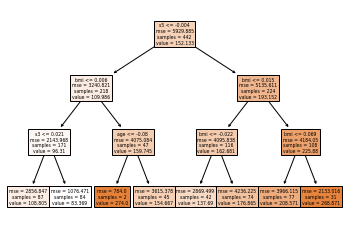

In [28]:
plot_tree(rt, filled=True, feature_names=diabetes.feature_names)
plt.show()


### 評価

交差確認による決定係数を用いた評価

In [29]:
scores = cross_val_score(rt, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.31 +/- 0.13 


ひとつ抜き方による二乗誤差を用いた評価

In [30]:
scores = cross_val_score(rt, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-3542.26


### ハイパーパラメータの変更

木を浅くしてみます。

In [31]:
rt2 = DecisionTreeRegressor(max_depth = 2)
rt2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

木の表示

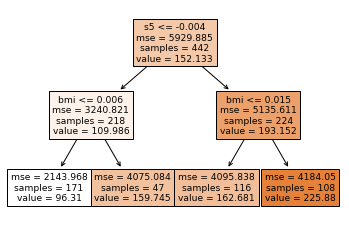

In [32]:
plot_tree(rt2, filled=True, feature_names=diabetes.feature_names)
plt.show()

交差確認による決定係数を用いた評価

In [33]:
scores = cross_val_score(rt2, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.20 +/- 0.24 


ひとつ抜き方による二乗誤差を用いた評価

In [34]:
scores = cross_val_score(rt2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-3554.94


木を深くしてみます。

In [36]:
rt3 = DecisionTreeRegressor(max_depth = 6)
rt3.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

木の表示

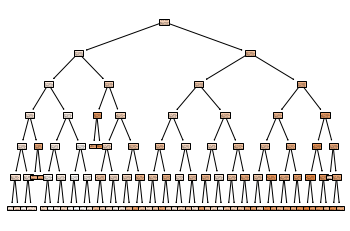

In [37]:
plot_tree(rt3, filled=True, feature_names=diabetes.feature_names)
plt.show()

交差確認による決定係数を用いた評価

In [38]:
scores = cross_val_score(rt3, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.15 +/- 0.17 


ひとつ抜き方による二乗誤差を用いた評価

In [39]:
scores = cross_val_score(rt3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-5147.48
